In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Youtube_comment_emotion.xlsx")

In [3]:
def emotion_check(text):
    if "긍정" in text:
        return "긍정"
    else:
        return "부정"
        

In [4]:
df['emotion_v2'] = df['감정모델 예측'].apply(lambda x: emotion_check(x) )

In [5]:
df['emotion_v3'] = df['감정모델 예측'].apply(lambda x: float(x[:5]))

In [6]:
df

,댓글,작성자,날짜,좋아요 수,감정모델 예측,emotion_v2,emotion_v3
0,뉴욕에서 결재하기가 ㅠㅠㅠ,Dong Won Kim,2022-05-12T13:01:01Z,0,89.91% 확률로 부정 리뷰입니다.,부정,89.91
1,좋은 영상 너무 감사해요ㅎㅎㅎㅎ,전지영,2022-03-27T14:53:57Z,2,89.64% 확률로 긍정 리뷰입니다.,긍정,89.64
2,초보 유튜버에게 진짜 좋은 꿀팁이네요 매번 힘들고 귀찮게 음악찾고 무료라고 했는데 ...,오꼬리 Ohhggorri,2021-11-15T08:30:20Z,2,93.05% 확률로 긍정 리뷰입니다.,긍정,93.05
3,답글 감사합니다 작가님,오꼬리 Ohhggorri,2021-11-15T10:53:52Z,0,80.03% 확률로 긍정 리뷰입니다.,긍정,80.03
4,핸드폰이든 컴퓨터든 음악은 모두 중요하니 추천드립니다 ㅎㅎ 구매하면 계속 쓰실 수 ...,TAE태영작가,2021-11-15T10:45:47Z,1,95.05% 확률로 긍정 리뷰입니다.,긍정,95.05
...,...,...,...,...,...,...,...
63,이트리스트랑 모션엘리먼츠 쓰지만 노래감성 안맞을때 많았는데 ㅋㅋㅋ 한국업체에도 이렇...,Silvergun,2021-10-29T03:57:25Z,2,94.89% 확률로 긍정 리뷰입니다.,긍정,94.89
64,좋아요 항상 화이팅입니다,TAE태영작가,2021-10-29T05:20:26Z,0,96.12% 확률로 긍정 리뷰입니다.,긍정,96.12
65,아트리스트도 구매해서 사용중인데 문제없겠죠,유랑즈 URangz,2021-10-29T03:54:16Z,2,93.04% 확률로 긍정 리뷰입니다.,긍정,93.04
66,아트리스트 저도 수년간 사용했는데 저작권 이슈가 여러 차례 발생해서 고생을 좀 했습...,TAE태영작가,2021-10-29T05:19:58Z,1,93.72% 확률로 부정 리뷰입니다.,부정,93.72


In [31]:
df.to_excel('last_results.xlsx',index=None)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 2)

In [9]:
plt.rcParams['font.family'] = 'Malgun Gothic'

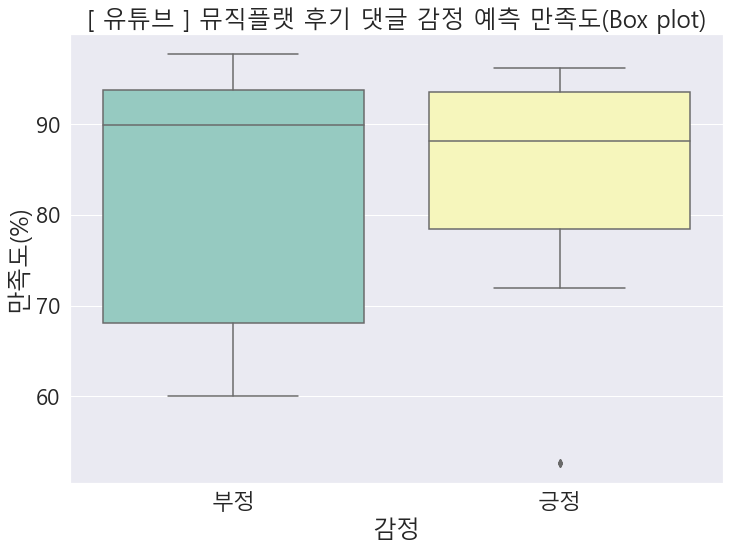

In [30]:
ax = sns.boxplot(x = 'emotion_v2', y = 'emotion_v3',data=df
            , palette='Set3')
ax.set_title('[ 유튜브 ] 뮤직플랫 후기 댓글 감정 예측 만족도(Box plot)')
ax.set_xlabel('감정')
ax.set_ylabel('만족도(%)')

plt.savefig('save.png', dpi=300)

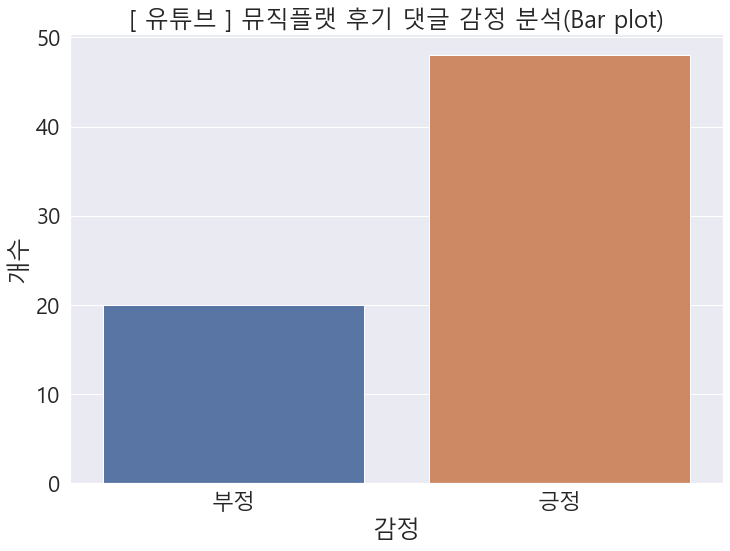

In [11]:
ax2 = sns.countplot(x='emotion_v2', data = df)
ax2.set_title("[ 유튜브 ] 뮤직플랫 후기 댓글 감정 분석(Bar plot)")
ax2.set_xlabel('감정')
ax2.set_ylabel('개수')
plt.savefig('save2.png', dpi=300)

In [20]:
smile = round(len(df[df['emotion_v2'] == '긍정'] ) / len(df) * 100 , 2)
smile

70.59

In [23]:
unhappy = round(len(df[df['emotion_v2'] == '부정'] ) / len(df) * 100 , 2)
unhappy

29.41

In [26]:
df_per = pd.DataFrame({'긍정':[smile], '부정':[unhappy]})
df_per

,긍정,부정
0,70.59,29.41


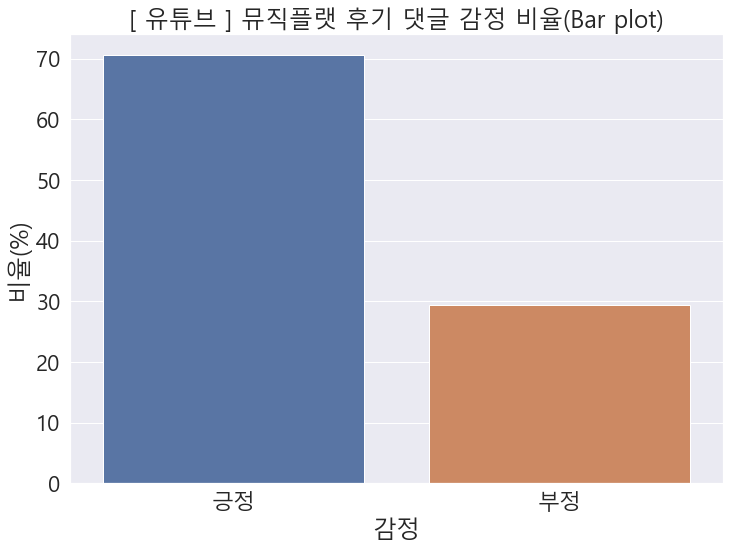

In [29]:
ax3 = sns.barplot( data = df_per)
ax3.set_title("[ 유튜브 ] 뮤직플랫 후기 댓글 감정 비율(Bar plot)")
ax3.set_xlabel('감정')
ax3.set_ylabel('비율(%)')
plt.savefig('save3.png', dpi=300)